In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
a = np.arange(24).reshape(6,4)

In [3]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

Array operations dows not work on arrays with unrelated shapes:

In [4]:
a * np.array([10,20])

ValueError: operands could not be broadcast together with shapes (6,4) (2,) 

# Broadcasting
As a first example, suppose we would like to operate on the last dimension, multipling all rows with one vector:

In [5]:
b = np.array([12, 3, 20, 5])
b

array([12,  3, 20,  5])

In [6]:
print(a.shape)
print(b.shape)

(6, 4)
(4,)


If the last dimension(s) size(s) are equal, numpy will **broadcast** the smaller array across all other dimensions: 

In [7]:
a*b

array([[  0,   3,  40,  15],
       [ 48,  15, 120,  35],
       [ 96,  27, 200,  55],
       [144,  39, 280,  75],
       [192,  51, 360,  95],
       [240,  63, 440, 115]])

i.e. this is the same as operating on the following 6x4 array:

In [8]:
a * np.array([
    b,
    b,
    b,
    b,
    b,
    b,
])

array([[  0,   3,  40,  15],
       [ 48,  15, 120,  35],
       [ 96,  27, 200,  55],
       [144,  39, 280,  75],
       [192,  51, 360,  95],
       [240,  63, 440, 115]])

# Let's try doing the same thing with the columns:

In [9]:
c = np.linspace(100,600,6)
c

array([100., 200., 300., 400., 500., 600.])

In [10]:
a+c

ValueError: operands could not be broadcast together with shapes (6,4) (6,) 

So broadcasting works only if the LAST axis matches, i.e. (6, 4)*(4,) can work but not (6, 4)* (6,).

However, if we reshape the array in one of the folllowing ways:

In [11]:
c.reshape(6,1)

array([[100.],
       [200.],
       [300.],
       [400.],
       [500.],
       [600.]])

In [12]:
c[:, np.newaxis]

array([[100.],
       [200.],
       [300.],
       [400.],
       [500.],
       [600.]])

We get an array of shape (6, 1) that can be broadcasted to (6, 4):

In [13]:
a+c[:, np.newaxis]

array([[100., 101., 102., 103.],
       [204., 205., 206., 207.],
       [308., 309., 310., 311.],
       [412., 413., 414., 415.],
       [516., 517., 518., 519.],
       [620., 621., 622., 623.]])

Another example, broadcasting a (3,) shaped array to a (w, h, 3) shaped array:

(480, 640, 3)

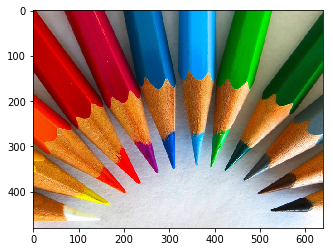

In [14]:
pic = imread("pencils.jpeg") / 255
imshow(pic)
pic.shape

In [15]:
pic[0,0]

array([0.70588235, 0.01568627, 0.02352941])

In [16]:
v1 = np.array([0.1, 1, 2])
print(pic.shape, v1.shape)

(480, 640, 3) (3,)


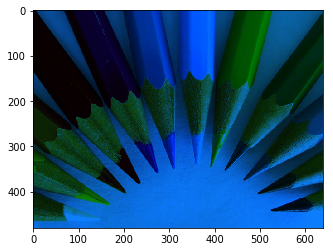

In [17]:
imshow(pic * v1 / 2);

Let's try to broadcast an array of shape (w, 3) - that holds data for three channels into (h, w, 3):

In [18]:
width = pic.shape[1]
v2 = np.dstack([
    linspace(0, 1, width),
    linspace(1, 0, width),
    sin(linspace(0,pi, width)),
])[0]
print(pic.shape, v2.shape)

(480, 640, 3) (640, 3)


In [19]:
v2

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.56494523e-03, 9.98435055e-01, 4.91640062e-03],
       [3.12989045e-03, 9.96870110e-01, 9.83268241e-03],
       ...,
       [9.96870110e-01, 3.12989045e-03, 9.83268241e-03],
       [9.98435055e-01, 1.56494523e-03, 4.91640062e-03],
       [1.00000000e+00, 0.00000000e+00, 1.22464680e-16]])

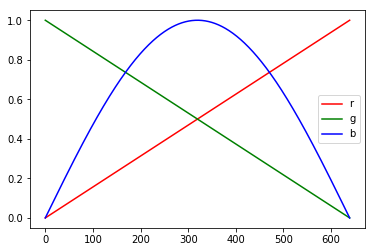

In [20]:
for i, channel in enumerate('rgb'):
    plot(v2[:,i], label=channel, color=channel)
legend();

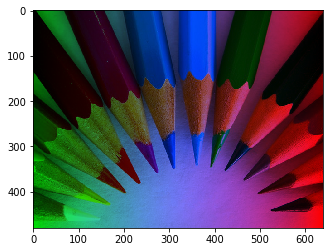

In [22]:
imshow(pic * v2);